# 1.Importing of Library

In [493]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

# 2.Loading of Dataset

In [494]:
data=pd.read_csv('corona_tested_individuals_subset_ver_00100.csv')

# 3.Data Cleaning

In [495]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-05-16,0,0,0,0,0,אחר,NaN,NaN,Other
1,2021-05-16,0,0,0,0,0,שלילי,NaN,NaN,Other
2,2021-05-16,0,0,0,0,0,שלילי,NaN,NaN,Other
3,2021-05-16,0,0,0,0,0,שלילי,NaN,NaN,Other
4,2021-05-16,0,0,0,0,0,שלילי,NaN,NaN,Other


In [496]:
data.shape

(240310, 10)

In [497]:
data.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       240310
gender                 100653
test_indication             0
dtype: int64

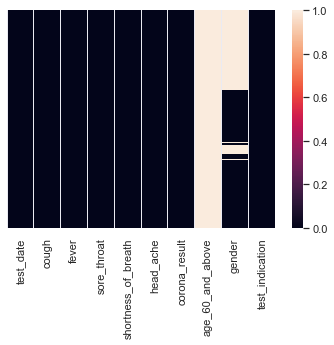

In [498]:
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()

In [499]:
data.drop(['age_60_and_above'],axis=1,inplace=True)
data.drop(['test_date'],axis=1,inplace=True)

In [500]:
data=data.dropna()

In [501]:
data.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
gender                 0
test_indication        0
dtype: int64

In [502]:
data['corona_result'].value_counts()

שלילי    134707
אחר        4689
חיובי       261
Name: corona_result, dtype: int64

In [503]:
data['gender'].value_counts()

נקבה    74159
זכר     65498
Name: gender, dtype: int64

In [504]:
data['corona_result'].replace('שלילי','Negative',inplace=True)
data['corona_result'].replace('חיובי','Positive',inplace=True)
data['corona_result'].replace('אחר','Other',inplace=True)

In [505]:
data['gender'].replace('נקבה','Female',inplace=True)
data['gender'].replace('זכר','Male',inplace=True)

In [506]:
data.shape

(139657, 8)

In [507]:
data['corona_result'].value_counts()

Negative    134707
Other         4689
Positive       261
Name: corona_result, dtype: int64

In [508]:
data=data[data['corona_result']!='Other']

In [509]:
for i in data.columns:
    print('Attribute Name:',i)
    print("------------------")
    print(data[i].value_counts())
    print('--------------------')

Attribute Name: cough
------------------
0    132476
1      2492
Name: cough, dtype: int64
--------------------
Attribute Name: fever
------------------
0    133142
1      1826
Name: fever, dtype: int64
--------------------
Attribute Name: sore_throat
------------------
0    134302
1       666
Name: sore_throat, dtype: int64
--------------------
Attribute Name: shortness_of_breath
------------------
0    134766
1       202
Name: shortness_of_breath, dtype: int64
--------------------
Attribute Name: head_ache
------------------
0    133776
1      1192
Name: head_ache, dtype: int64
--------------------
Attribute Name: corona_result
------------------
Negative    134707
Positive       261
Name: corona_result, dtype: int64
--------------------
Attribute Name: gender
------------------
Female    71245
Male      63723
Name: gender, dtype: int64
--------------------
Attribute Name: test_indication
------------------
Other                     131792
Contact with confirmed      2707
Abroad     

In [510]:
data.shape

(134968, 8)

In [511]:
data.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
88408,1,0,0,0,0,Negative,Male,Other
88409,0,0,0,0,0,Negative,Female,Other
88410,0,0,0,0,0,Negative,Female,Other
88411,0,0,0,0,0,Negative,Female,Other
88412,0,0,0,0,0,Negative,Male,Other
88413,0,0,0,0,0,Negative,Male,Other
88414,0,0,0,0,0,Negative,Female,Other
88415,0,0,0,0,0,Negative,Female,Other
88416,0,0,0,0,0,Negative,Male,Other
88417,0,0,0,0,0,Negative,Female,Other


In [512]:
data[['gender']] = encoder.fit_transform(data['gender'].astype(str))
data[['test_indication']] = encoder.fit_transform(data['test_indication'].astype(str))
data[['corona_result']] = encoder.fit_transform(data['corona_result'].astype(str))

In [513]:
data['corona_result'].value_counts()

0    134707
1       261
Name: corona_result, dtype: int64

In [514]:
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
88408,1,0,0,0,0,0,1,2
88409,0,0,0,0,0,0,0,2
88410,0,0,0,0,0,0,0,2
88411,0,0,0,0,0,0,0,2
88412,0,0,0,0,0,0,1,2


In [515]:
data.dtypes

cough                  int64
fever                  int64
sore_throat            int64
shortness_of_breath    int64
head_ache              int64
corona_result          int32
gender                 int32
test_indication        int32
dtype: object

In [516]:
data.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,gender,test_indication
count,134968.000000,134968.000000,134968.000000,134968.000000,134968.000000,134968.000000,134968.000000,134968.000000
mean,0.018464,0.013529,0.004935,0.001497,0.008832,0.001934,0.472134,1.972994
std,0.134621,0.115526,0.070073,0.038658,0.093562,0.043933,0.499225,0.182283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [517]:
missing_values=data.isnull().sum()

percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
cough,0,0.0
fever,0,0.0
sore_throat,0,0.0
shortness_of_breath,0,0.0
head_ache,0,0.0
corona_result,0,0.0
gender,0,0.0
test_indication,0,0.0


# 4.Data Visualisation

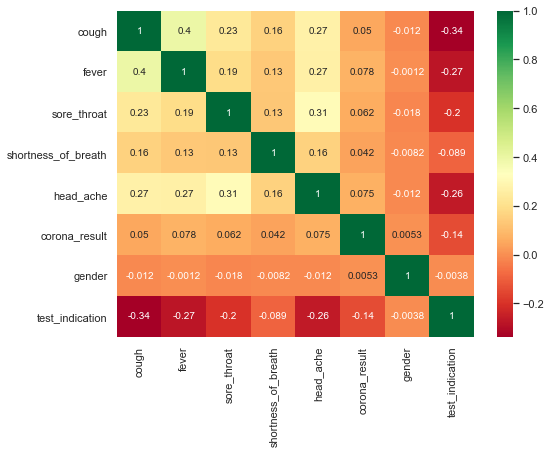

In [518]:
corrmat=data.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(8,6))
g=sns.heatmap(data[top_corr_feature].corr(),annot=True,cmap='RdYlGn')

In [519]:
plt.figure(figsize=(20,12))
data.corrwith(data['corona_result'])

cough                  0.050338
fever                  0.078056
sore_throat            0.061883
shortness_of_breath    0.041922
head_ache              0.075157
corona_result          1.000000
gender                 0.005328
test_indication       -0.139662
dtype: float64

<Figure size 1440x864 with 0 Axes>

Negative(0): 134707
Positive(1): 261


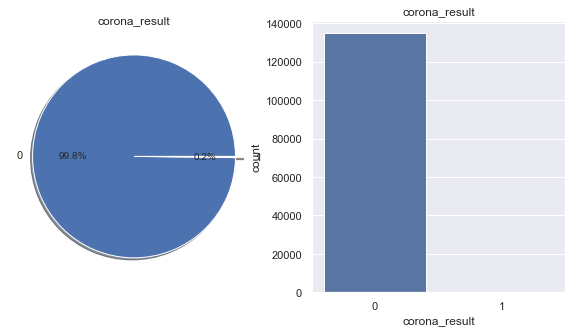

In [520]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['corona_result'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('corona_result')
ax[0].set_ylabel('')
sns.countplot('corona_result',data=data,ax=ax[1])
ax[1].set_title('corona_result')
N,P=data['corona_result'].value_counts()
print('Negative(0):',N)
print('Positive(1):',P)
plt.show()

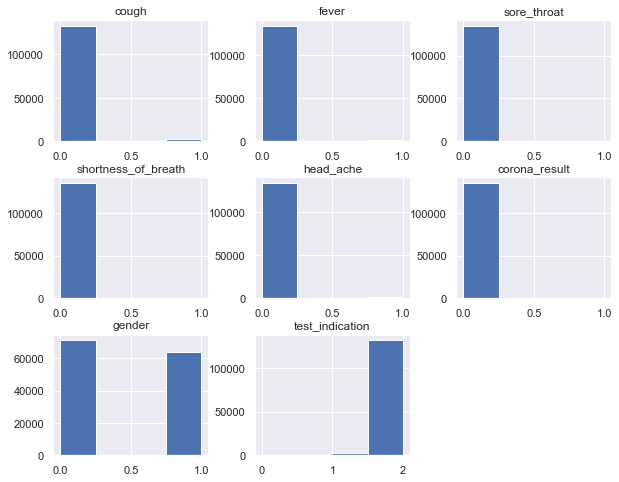

In [521]:
data.hist(bins=4,figsize=(10,8))
plt.show()

# 5. Under Sampling

In [522]:
minority_class_len=len(data[data['corona_result']==1])
print(minority_class_len)

261


In [523]:
majority_class_indices=data[data['corona_result']==0].index
print(majority_class_indices)

Int64Index([ 88408,  88409,  88410,  88411,  88412,  88413,  88414,  88415,
             88416,  88417,
            ...
            240300, 240301, 240302, 240303, 240304, 240305, 240306, 240307,
            240308, 240309],
           dtype='int64', length=134707)


In [524]:
np.random.seed(7)
random_majority_indices=np.random.choice(majority_class_indices,minority_class_len,replace=False)
print(len(random_majority_indices))

261


In [525]:
minority_class_indices=data[data['corona_result']==1].index
print(minority_class_indices)

Int64Index([ 88926,  88993,  88997,  89030,  89037,  89058,  89060,  89114,
             89145,  89158,
            ...
            239750, 239761, 239773, 239777, 239811, 239812, 239821, 239822,
            239826, 239830],
           dtype='int64', length=261)


In [526]:
under_sample_indices=np.concatenate([minority_class_indices,random_majority_indices])

In [527]:
under_sample=data.loc[under_sample_indices]

In [528]:
under_sample.shape

(522, 8)

<AxesSubplot:xlabel='corona_result', ylabel='count'>

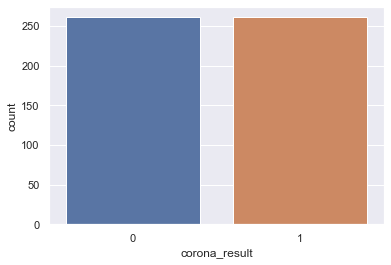

In [529]:
sns.countplot(x='corona_result',data=under_sample)

In [530]:
X=under_sample.drop('corona_result',axis=1)
y=under_sample['corona_result']

In [531]:
X.shape

(522, 7)

In [532]:
y.shape

(522,)

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=10)

# 6.Different Training Models

6.1 LOGISTIC REGRESSION

*******PERFORMANCE DETAILS OF LOGISTIC REGRESSION********

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        58
           1       1.00      0.77      0.87        47

    accuracy                           0.90       105
   macro avg       0.92      0.88      0.89       105
weighted avg       0.91      0.90      0.89       105

0.8952380952380953


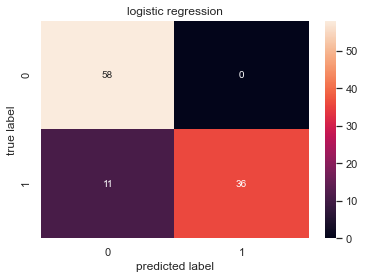

In [534]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.0001, max_iter=100, penalty='none', solver='newton-cg')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
acc_lr=accuracy_score(y_test,y_pred)
recall_lr = rs(y_test,y_pred)
precision_lr = ps(y_test,y_pred)
f1_lr = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF LOGISTIC REGRESSION********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True)
ax.set(title="logistic regression", xlabel="predicted label", ylabel="true label",)
sns.set(font_scale=1)
print(acc_lr)

6.2 RANDOM FOREST CLASSIFIER

*******PERFORMANCE DETAILS OF RANDOM FOREST CLASSIFIER********

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        58
           1       1.00      0.79      0.88        47

    accuracy                           0.90       105
   macro avg       0.93      0.89      0.90       105
weighted avg       0.92      0.90      0.90       105

0.9047619047619048


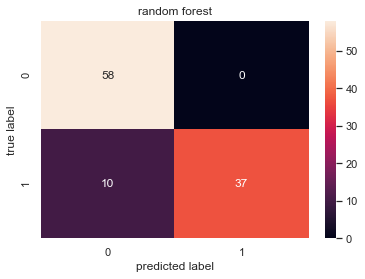

In [535]:
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(criterion='gini',bootstrap=True,max_depth=3,min_samples_split=2,max_features='sqrt',n_estimators=10)
Classifier.fit(X_train,y_train)
y_pred=Classifier.predict(X_test)
acc_RF=accuracy_score(y_test,y_pred)  #min_samples_leaf=1 '
recall_RF = rs(y_test,y_pred)
precision_RF = ps(y_test,y_pred)
f1_RF = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF RANDOM FOREST CLASSIFIER********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True)
ax.set(title="random forest", xlabel="predicted label", ylabel="true label",)
sns.set(font_scale=1)
print(acc_RF)

 6.3 K-NEIGHBORS CLASSIFIER 

*******PERFORMANCE DETAILS OF K-NEIGHBORS CLASSIFIER********

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        58
           1       1.00      0.72      0.84        47

    accuracy                           0.88       105
   macro avg       0.91      0.86      0.87       105
weighted avg       0.90      0.88      0.87       105



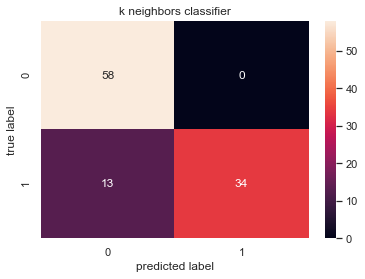

In [536]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, p=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_KNN=accuracy_score(y_test,y_pred)
recall_KNN = rs(y_test,y_pred)
precision_KNN = ps(y_test,y_pred)
f1_KNN = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF K-NEIGHBORS CLASSIFIER********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True)
ax.set(title="k neighbors classifier",xlabel="predicted label",ylabel="true label",)
sns.set(font_scale=1)

6.4 SUPPORT VECTOR MACHINE

*******PERFORMANCE DETAILS OF SUPPORT VECTOR MACHINE********

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        58
           1       1.00      0.77      0.87        47

    accuracy                           0.90       105
   macro avg       0.92      0.88      0.89       105
weighted avg       0.91      0.90      0.89       105



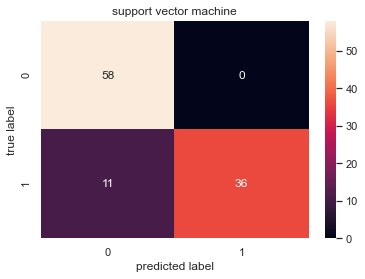

In [537]:
from sklearn import svm
clf = svm.SVC(C=1,degree=3,kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_SVM=accuracy_score(y_test,y_pred)
recall_SVM = rs(y_test,y_pred)
precision_SVM = ps(y_test,y_pred)
f1_SVM = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF SUPPORT VECTOR MACHINE********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True)
ax.set(title="support vector machine", xlabel="predicted label",ylabel="true label",)
sns.set(font_scale=1)

6.5 GAUSSIAN NAIVE BAYES CLASSIFIER

*******PERFORMANCE DETAILS OF GAUSSIAN NAIVE BAYES CLASSIFIER********

              precision    recall  f1-score   support

           0       0.72      1.00      0.83        58
           1       1.00      0.51      0.68        47

    accuracy                           0.78       105
   macro avg       0.86      0.76      0.76       105
weighted avg       0.84      0.78      0.76       105



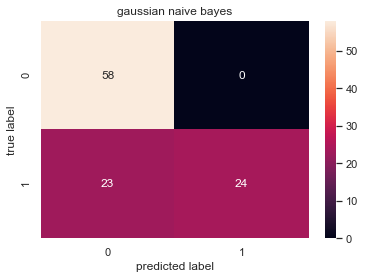

In [538]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.1)
GNB.fit(X_train,y_train)
y_pred=GNB.predict(X_test)
acc_GNB=accuracy_score(y_test,y_pred)
recall_GNB= rs(y_test,y_pred)
precision_GNB = ps(y_test,y_pred)
f1_GNB = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF GAUSSIAN NAIVE BAYES CLASSIFIER********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True)
ax.set(title="gaussian naive bayes", xlabel="predicted label", ylabel="true label",)
sns.set(font_scale=1)

6.6 DECISION TREE

*******PERFORMANCE DETAILS OF DECISION TREE********

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        58
           1       1.00      0.74      0.85        47

    accuracy                           0.89       105
   macro avg       0.91      0.87      0.88       105
weighted avg       0.91      0.89      0.88       105



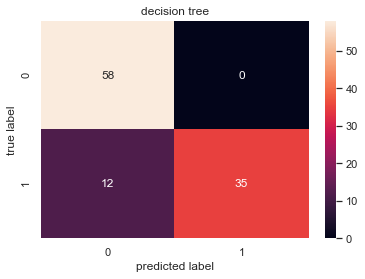

In [539]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion= 'gini',max_depth=4,min_samples_leaf=3,min_samples_split=2)
t.fit(X_train,y_train)
y_pred = t.predict(X_test)
acc_DT=accuracy_score(y_test,y_pred)
recall_DT = rs(y_test,y_pred)
precision_DT = ps(y_test,y_pred)
f1_DT = fs(y_test,y_pred)
print('*******PERFORMANCE DETAILS OF DECISION TREE********\n')
print(classification_report(y_test,y_pred))
cf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
ax =sns.heatmap(cf_matrix,annot=True)
ax.set(title="decision tree",xlabel="predicted label",ylabel="true label",)
sns.set(font_scale=1)

# 7 Performance Comparision

In [540]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest', 'KNN','Support Vector Machines', 'Gaussian Naive Bayes',   
              'Decision Tree'],
    'Accuracy': [acc_lr, acc_RF, acc_KNN, acc_SVM, acc_GNB, acc_DT],
    'Recall'  : [recall_lr,recall_RF,recall_KNN,recall_SVM,recall_GNB,recall_DT],
    'Precision':[precision_lr,precision_RF,precision_KNN,precision_SVM,acc_GNB,precision_DT],
    'F-1 Score':[f1_lr,f1_RF,f1_KNN,f1_SVM,f1_GNB,f1_DT]})
models.sort_values(by='Accuracy', ascending=True).style.hide_index()

Model,Accuracy,Recall,Precision,F-1 Score
Gaussian Naive Bayes,0.780952,0.510638,0.780952,0.676056
KNN,0.876190,0.723404,1.000000,0.839506
Decision Tree,0.885714,0.744681,1.000000,0.853659
Logistic Regression,0.895238,0.765957,1.000000,0.867470
Support Vector Machines,0.895238,0.765957,1.000000,0.867470
Random Forest,0.904762,0.787234,1.000000,0.880952


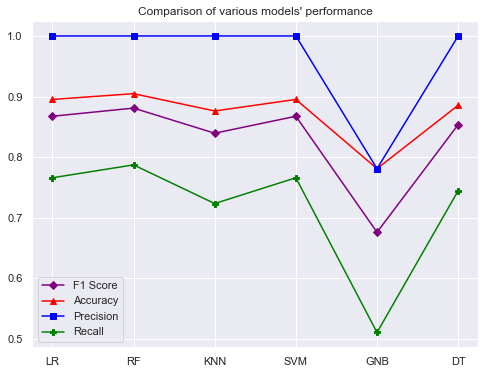

In [541]:
fig = plt.figure(figsize=(8,6))

plt.plot(['LR','RF', 'KNN','SVM', 'GNB','DT'],[f1_lr,f1_RF,f1_KNN,f1_SVM,f1_GNB,f1_DT],color='purple',marker='D')
plt.plot(['LR','RF', 'KNN','SVM', 'GNB','DT'],[acc_lr,acc_RF,acc_KNN,acc_SVM,acc_GNB,acc_DT],color='red',marker='^')
plt.plot(['LR','RF', 'KNN','SVM', 'GNB','DT'],[precision_lr,precision_RF,precision_KNN,precision_SVM,acc_GNB,precision_DT],color='blue',marker='s')
plt.plot(['LR','RF', 'KNN','SVM', 'GNB','DT'],[recall_lr,recall_RF,recall_KNN,recall_SVM,recall_GNB,recall_DT],color='green',marker='P')
plt.legend(('F1 Score','Accuracy','Precision','Recall'))
plt.title('Comparison of various models\' performance')
plt.show(fig)

<BarContainer object of 6 artists>

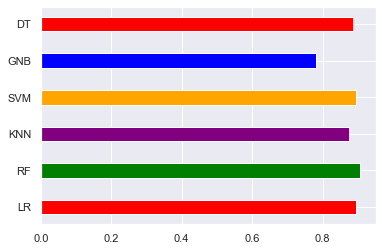

In [542]:
fig = plt.figure(figsize=(6,4))
plt.barh(['LR','RF', 'KNN','SVM', 'GNB','DT'],[acc_lr,acc_RF,acc_KNN,acc_SVM,acc_GNB,acc_DT],color=['red','green','purple','orange','Blue'],height=0.4)